# Getting started with the Keras sequential model

In [2]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense

# Commonly used modules
import numpy as np
import os
import sys
import random

# Images, plots, display, and visualization
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import cv2
import IPython
from six.moves import urllib

print(tf.__version__)

1.14.0


In [2]:
# Set common constants
this_repo_url = 'https://github.com/CLynie/Lynie_tensorflow-tutorial/blob/master/'
this_tutorial_url = this_repo_url + 'Classification_of_MNIST '

The MNIST dataset containss 70,000 grayscale images of handwritten digits at a resolution of 28 by 28 pixels. The task is to take one of these images as input and predict the most likely digit contained in the image (along with a relative confidence in this prediction):

![prediction]("https://i.imgur.com/ITrm9x4.png")


Now, we load the dataset. The images are 28x28 NumPy arrays, with pixel values ranging between 0 and 255. The *labels* are an array of integers, ranging from 0 to 9.

In [3]:
(train_images, train_labels), (test_images, test_labels) = keras.datasets.mnist.load_data()

# reshape images to specify that it's a single channel
train_images = train_images.reshape(train_images.shape[0], 28, 28, 1)
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1)

We <b> scale these values </b> to a range of <b> 0 to 1 </b> before feeding to the neural network model. For this, we divide the values by 255. It's important that the **_training set_** and the **_testing set_** are preprocessed in the same way:

In [4]:
def preprocess_images(imgs): # should work for both a single image and multiple images
    sample_img = imgs if len(imgs.shape) == 2 else imgs[0]
    assert sample_img.shape in [(28, 28, 1), (28, 28)], sample_img.shape # make sure images are 28x28 and single-channel (grayscale)
    return imgs / 255.0

train_images = preprocess_images(train_images)
print(np.shape(train_images))
test_images = preprocess_images(test_images)

(60000, 28, 28, 1)


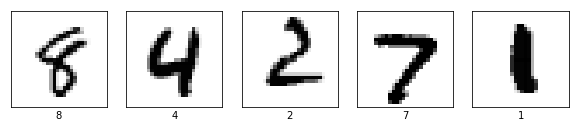

In [5]:
plt.figure(figsize=(10,2))
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    rd = random.randrange(train_images.shape[0]-5)
    plt.imshow(train_images[i+rd].reshape(28, 28), cmap=plt.cm.binary)
    plt.xlabel(train_labels[i+rd])

### Build the model

Building the neural network requires configuring the layers of the model, then compiling the model. In many cases, this can be reduced to simply __stacking together layers__ :

### Train the model

Training the neural network model requires the following steps:

1. Feed the training data to the model—in this example, the `train_images` and `train_labels` arrays.
2. The model learns to associate images and labels.
3. We ask the model to make predictions about a test set—in this example, the `test_images` array. We verify that the predictions match the labels from the `test_labels` array. 

To start training,  call the `model.fit` method—the model is "fit" to the training data:


###



### The character of activation:
1. Nonlinear
2. Range
3. Continuously differentiable
4. Monotonic
5. Smooth functions with a monotonic derivative
6. Approximates identity near the origin


### Test every activate function
Most of the tutorials try the tf.nn.relu for mnist. But why?
Here I present every activation, here comes the results:

In [6]:
epochs = 5

for active in ['relu','tanh','sigmoid','selu','softmax','softplus','softsign','hard_sigmoid','exponential','linear']:
    model = keras.Sequential()
    # 32 convolution filters used each of size 3x3
    model.add(Conv2D(32, kernel_size=(3, 3), activation=active, input_shape=(28, 28, 1)))
    # 64 convolution filters used each of size 3x3
    model.add(Conv2D(64, (3, 3), activation=active))
    # choose the best features via pooling
    model.add(MaxPooling2D(pool_size=(2, 2)))
    # randomly turn neurons on and off to improve convergence
    model.add(Dropout(0.25))
    # flatten since too many dimensions, we only want a classification output
    model.add(Flatten())
    # fully connected to get all relevant data
    model.add(Dense(128, activation=active))
    # one more dropout
    model.add(Dropout(0.5))
    # output a softmax to squash the matrix into output probabilities
    model.add(Dense(10, activation='softmax'))
    model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

    history = model.fit(train_images, train_labels, epochs=epochs)
    print(test_images.shape)
    test_loss, test_acc = model.evaluate(test_images, test_labels)

    print(active + '\'s Test accuracy:', test_acc)

W0703 17:34:35.112411 140685230528256 deprecation.py:323] From /usr/local/lib/python3.6/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 48s 807us/sample - loss: 0.1974 - accuracy: 0.9409
Epoch 2/5
60000/60000 [==============================] - 47s 790us/sample - loss: 0.0815 - accuracy: 0.9756
Epoch 3/5
60000/60000 [==============================] - 48s 808us/sample - loss: 0.0620 - accuracy: 0.9814
Epoch 4/5
60000/60000 [==============================] - 48s 803us/sample - loss: 0.0492 - accuracy: 0.9852
Epoch 5/5
60000/60000 [==============================] - 50s 830us/sample - loss: 0.0427 - accuracy: 0.9867
(10000, 28, 28, 1)
10000/10000 [==============================] - 2s 168us/sample - loss: 0.0306 - accuracy: 0.9902
relu's Test accuracy: 0.9902
Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 51s 855us/sample - loss: 0.2159 - accuracy: 0.9338
Epoch 2/5
60000/60000 [==============================] - 52s 867us/sample - loss: 0.1199 - accuracy: 0.9639
Epoch 3/5
60000/60000 [==============================

### Test accuracy

It said too much good things can be harmful:
The choise of activation is fundamental:

    relu's           Test accuracy: 0.992
    softsign's       Test accuracy: 0.9833
    selu's           Test accuracy: 0.9828
    tanh's           Test accuracy: 0.9805
    softplus's       Test accuracy: 0.9804
    linear's         Test accuracy: 0.9775
    softmax's        Test accuracy: 0.9656
    sigmoid's        Test accuracy: 0.101
    hard_sigmoid's   Test accuracy: 0.101
    exponential's    Test accuracy: 0.098

The accuracy can be little difference
Here comes the question:
1. The combination of activation can be better?
2. Why relu, why not the other function:

To test the 1st question, here we try:

In [8]:
epochs = 5
model = keras.Sequential()
# 32 convolution filters used each of size 3x3
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
# 64 convolution filters used each of size 3x3
model.add(Conv2D(64, (3, 3), activation='softsign'))
# choose the best features via pooling
model.add(MaxPooling2D(pool_size=(2, 2)))
# randomly turn neurons on and off to improve convergence
model.add(Dropout(0.25))
# flatten since too many dimensions, we only want a classification output
model.add(Flatten())
# fully connected to get all relevant data
model.add(Dense(128, activation='selu'))
# one more dropout
model.add(Dropout(0.5))
# output a softmax to squash the matrix into output probabilities
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam', 
          loss='sparse_categorical_crossentropy',
          metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=epochs)
print(test_images.shape)
test_loss, test_acc = model.evaluate(test_images, test_labels)

print(active + '\'s Test accuracy:', test_acc)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 50s 838us/sample - loss: 0.1613 - accuracy: 0.9514
Epoch 2/5
60000/60000 [==============================] - 50s 833us/sample - loss: 0.0824 - accuracy: 0.9750
Epoch 3/5
60000/60000 [==============================] - 51s 842us/sample - loss: 0.0648 - accuracy: 0.9799
Epoch 4/5
60000/60000 [==============================] - 52s 861us/sample - loss: 0.0532 - accuracy: 0.9833
Epoch 5/5
60000/60000 [==============================] - 52s 863us/sample - loss: 0.0479 - accuracy: 0.9850
(10000, 28, 28, 1)
10000/10000 [==============================] - 2s 183us/sample - loss: 0.0425 - accuracy: 0.9877
linear's Test accuracy: 0.9877


It is too good thing make it worse.

### How to choose activation function:

In activation function,I choose: 

    the sigmoid function when I'm dealing with probabilities; 
    the ReLU when I'm dealing with positive values;
    the linear function when I'm dealing with general values ;

In hidden layers, the choice for them in the hidden layer is mostly due to trial and error:

    sigmoid;
    the leaky ReLU to avoid dead neurons instead of the ReLU; 
    the tanh instead of the sigmoid;
    ELU (exponential linear units)
    SELU (self-normalising version of ELU):Under some mild assumptions, SELU self-normalisation
    
[quote from ai.stackexchange](https://ai.stackexchange.com/questions/7088/how-to-choose-an-activation-function)
Or please see the [YouTube](https://www.youtube.com/watch?v=k678CW_LFwk)

ReLu:

    The advantage:
    
        Basically, “I want to see only what I am looking for”
        By zeroing “less relevant” signals, it can be recognized as “less relevant” or “more relevant”. 
        
    Situations:
        A rule of thumb is to use them after convolutional layers, 
        but sometimes they can be used after dense layers if you want more sparse activations.
        
Softmax:

    The advantage:
        Also known as “give-me-the-probability-distribution” function.
        Possibly helping to reduce the noise in following layers
        
    Situation:
         Using softmax as a gate.

Tanh

    The advantage:
        The sign of the output is relevant, but the magnitude can mess with the further computations.
        An elegant way to “squish” the output into [−1,1] range. 
        Preserving the sign and conforming to the boundary conditions
        
    Situations:
         It’s useful when after the magnitude of unprocessed output grows significantly, 
         the further growth is not that important, and vice versa; 
         when the fluctuations around zero make significant difference.
         
Rule of thumb (with the usual caveats on rules of thumb) from ![Karpathy et al in CS231.](./img/quora_1.png)

### Here we show you the experts version said by [tensorflow](https://www.tensorflow.org/overview/)
The Subclassing API provides a define-by-run interface for advanced research. 
Create a class for your model, then write the forward pass imperatively. 
Easily author custom layers, activations, and training loops. 
Run the “Hello World” example below, then visit the tutorials to learn more.

In [16]:
mnist = tf.keras.datasets.mnist

# It is the same for 
# (train_images, train_labels), (test_images, test_labels) = keras.datasets.mnist.load_data()

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

# Add a channels dimension
x_train = x_train[..., tf.newaxis]
x_test = x_test[..., tf.newaxis]

### batch 
Use tf.data to batch and shuffle the dataset.
First you should understand what is __online learning__

#### online learning
Now, you can start feeding the images from the training data one by one to the network, get the prediction (till this step it's called as __doing inference__), compute the __loss__, compute the __gradient__, and then __update__ the parameters of your network (i.e. __weights__ and __biases__) and then proceed with the next image ... This way of training the model is sometimes called as __online learning__.

But, you want 
+ the `training` to be __faster__, 
+ the `gradients` to be __less noisy__, 
+ take advantage of the power of __GPUs__ which are efficient at doing array operations (nD-arrays to be specific). 


So, what you instead do is feed in say __100 images__ at a time ( ***the choice of this size is up to you*** (i.e. it's a hyperparameter) and depends on your problem too). 
For instance, take a look at the below picture, (Author: __Martin Gorner__)

![100 image](./img/8FzdQ.png)
![on a batch of images](./img/vncAa.png)

Author: __Martin Gorner__

In [17]:
train_ds = tf.data.Dataset.from_tensor_slices(
    (x_train, y_train)).shuffle(10000).batch(32)
print(x_train.shape)
test_ds = tf.data.Dataset.from_tensor_slices((x_test, y_test)).batch(32)

(60000, 28, 28, 1)


### Using Class
Build the `tf.keras` model using the Keras [model subclassing API](https://www.tensorflow.org/guide/keras#model_subclassing):

The 1st difference is the `tf.nn.Dropout` is removed.
Dropout consists in randomly setting a fraction rate of inpute units to 0 at each update during training time, which helps __prevent overfitting__

In [18]:
class MyModel(tf.keras.Model):
  def __init__(self):
    super(MyModel, self).__init__()
    # 32 convolution filters used each of size 3x3
    # Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
    self.conv1 = Conv2D(32, 3, activation='relu')
    self.flatten = Flatten()    
    # 128 convolution filters used each of size 3x3
    self.d1 = Dense(128, activation='relu')
    self.dr = Dropout(0.25)
    # output a softmax to squash the matrix into output probabilities
    self.d2 = Dense(10, activation='softmax')

  def call(self, x):
    x = self.conv1(x)
    x = self.flatten(x)
    x = self.d1(x)
    x = self.dr(x)
    return self.d2(x)
model = MyModel()

loss_object = tf.keras.losses.SparseCategoricalCrossentropy()

optimizer = tf.keras.optimizers.Adam()

In [19]:
train_loss = tf.keras.metrics.Mean(name='train_loss')
train_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name='train_accuracy')

test_loss = tf.keras.metrics.Mean(name='test_loss')
test_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name='test_accuracy')

### GradientTape
Use tf.GradientTape to train the model:
`tf.GradientTape` API for automatic differentiation - computing the gradient of a computation with respect to its input variables

### train the model
Use `tf.GradientTape` to train the model:

In [20]:
@tf.function
def train_step(images, labels):
  with tf.GradientTape() as tape:
    predictions = model(images)
    loss = loss_object(labels, predictions)
  gradients = tape.gradient(loss, model.trainable_variables)
  optimizer.apply_gradients(zip(gradients, model.trainable_variables))

  train_loss(loss)
  train_accuracy(labels, predictions)

In [21]:
@tf.function
def test_step(images, labels):
  predictions = model(images)
  t_loss = loss_object(labels, predictions)

  test_loss(t_loss)
  test_accuracy(labels, predictions)

In [22]:
EPOCHS = 5

for epoch in range(EPOCHS):
  for images, labels in train_ds:
    train_step(images, labels)

  for test_images, test_labels in test_ds:
    test_step(test_images, test_labels)

  template = 'Epoch {}, Loss: {}, Accuracy: {}, Test Loss: {}, Test Accuracy: {}'
  print (template.format(epoch+1,
                         train_loss.result(),
                         train_accuracy.result()*100,
                         test_loss.result(),
                         test_accuracy.result()*100))

Epoch 1, Loss: 0.13381126523017883, Accuracy: 95.9749984741211, Test Loss: 0.05861267074942589, Test Accuracy: 98.16999816894531
Epoch 2, Loss: 0.08762375265359879, Accuracy: 97.33916473388672, Test Loss: 0.05746141076087952, Test Accuracy: 98.15999603271484
Epoch 3, Loss: 0.06518901139497757, Accuracy: 98.02111053466797, Test Loss: 0.060735978186130524, Test Accuracy: 98.1199951171875
Epoch 4, Loss: 0.05172641947865486, Accuracy: 98.42666625976562, Test Loss: 0.06828326731920242, Test Accuracy: 98.05500030517578
Epoch 5, Loss: 0.04335177317261696, Accuracy: 98.67933654785156, Test Loss: 0.0688379630446434, Test Accuracy: 98.09600067138672
